# Description

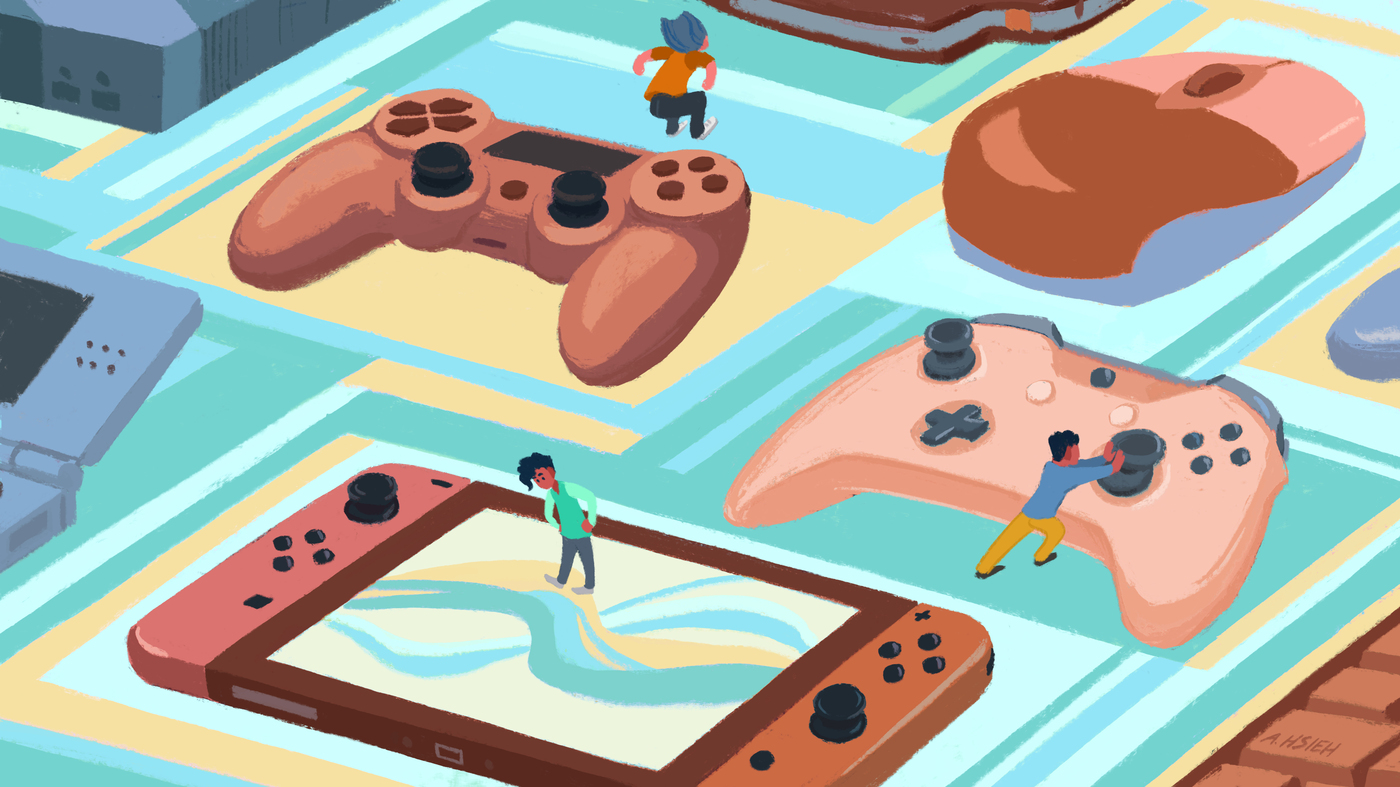

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Matrix column entries (attributes):

1. Rank - Ranking of overall sales

2.  Name - The games name

3.  Platform - Platform of the games release (i.e. PC,PS4, etc.)

4. Year - Year of the game's release

5. Genre - Genre of the game

6. Publisher - Publisher of the game

7. NA_Sales - Sales in North America (in millions)

8. EU_Sales - Sales in Europe (in millions)

9. JP_Sales - Sales in Japan (in millions)

10. Other_Sales - Sales in the rest of the world (in millions)

11. Global_Sales - Total worldwide sales.

















# Lib

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go


# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


#ML models
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Preview Data

In [2]:
df=pd.read_csv('../Game_Sales_Analysis/Datos.csv')
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [3]:
df.head()
df.shape

(16598, 11)

 Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [6]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Check duplication

In [7]:
len(df)-len(df.drop_duplicates())

0

# Data Preprocessing

In [8]:
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)


In [9]:
df.describe()


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [10]:
df.head()


Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# EDA

/Users/pablobasapacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

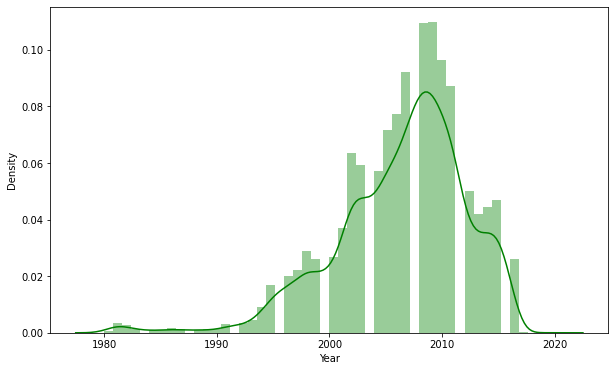

In [11]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

2009 has the highest numberof game releases



-------------------------------------------------------------

**Sales of different genre in North America**

Text(0.5, 1.0, 'Sales of different genre in North America')

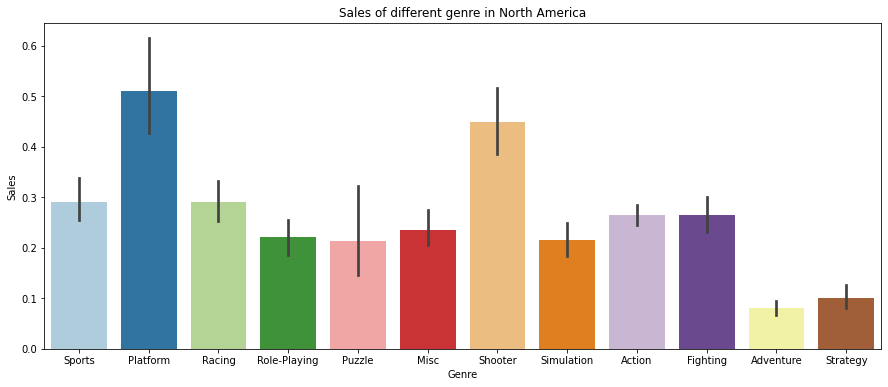

In [12]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

Platform and shooter games are the most played game genre in North America

---------------------------------------------------------

**Sales of different genre in Europe**

Text(0.5, 1.0, 'Sales of different genre in Europe')

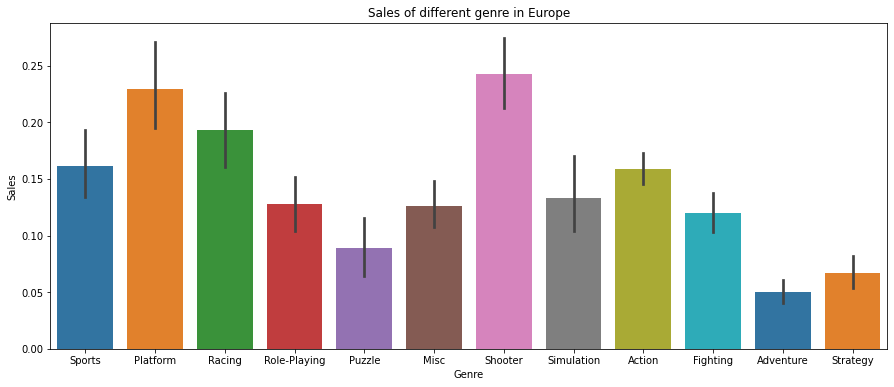

In [13]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='EU_Sales',data=df,palette='tab10')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')

Platform and shooter games are the most played game genre in Europe



---------------------------------------------------------------

**Sales of different genre in Japan**

Text(0.5, 1.0, 'Sales of different genre in Japan')

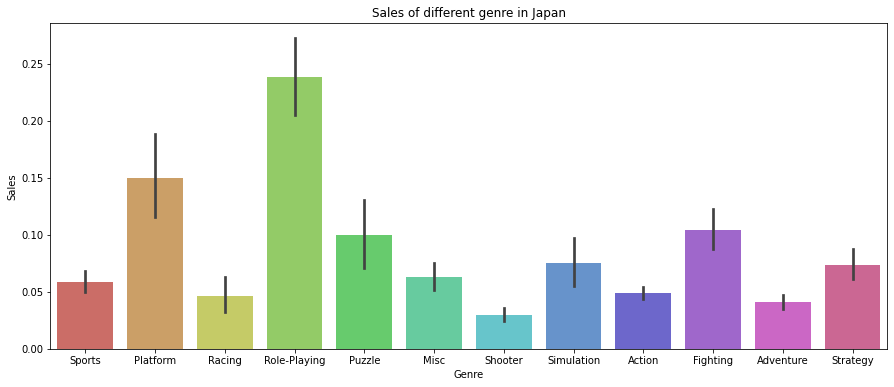

In [14]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='hls')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

Role play games are highly played in Japan



------------------------------------------------------------

**Sales of different genre in other Regions**

Text(0.5, 1.0, 'Sales of different genre in other Regions')

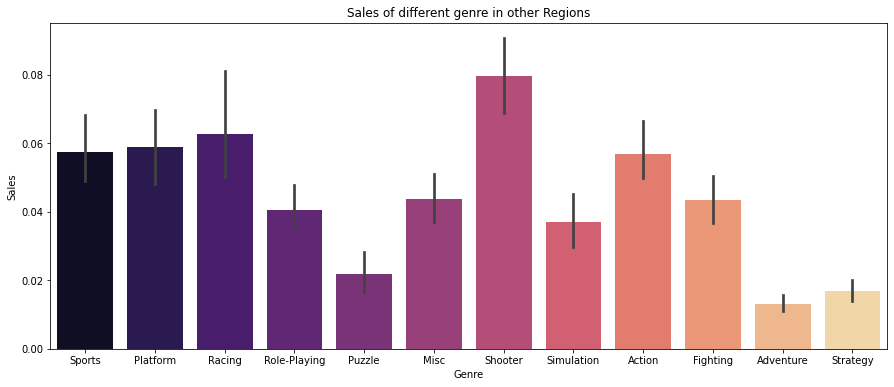

In [15]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Other_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre in other Regions')

**Sales of different genre Globally**

Text(0.5, 1.0, 'Sales of different genre Globally')

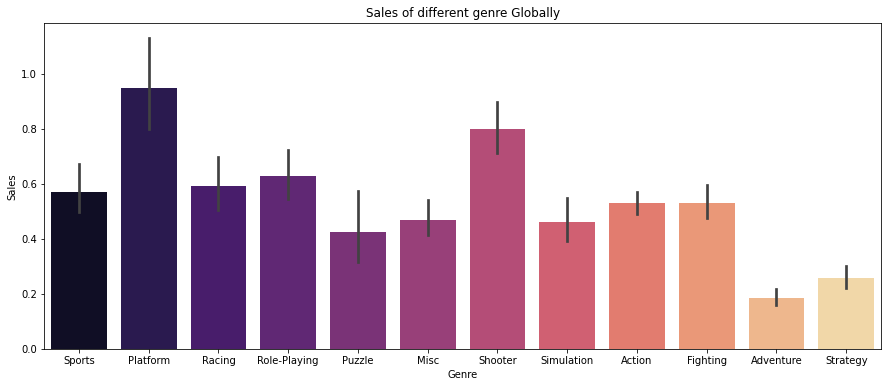

In [16]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

Platform and shooter games are the most played game genre Globally



---------------------------------------

Top 5 years games release by genre

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011')])

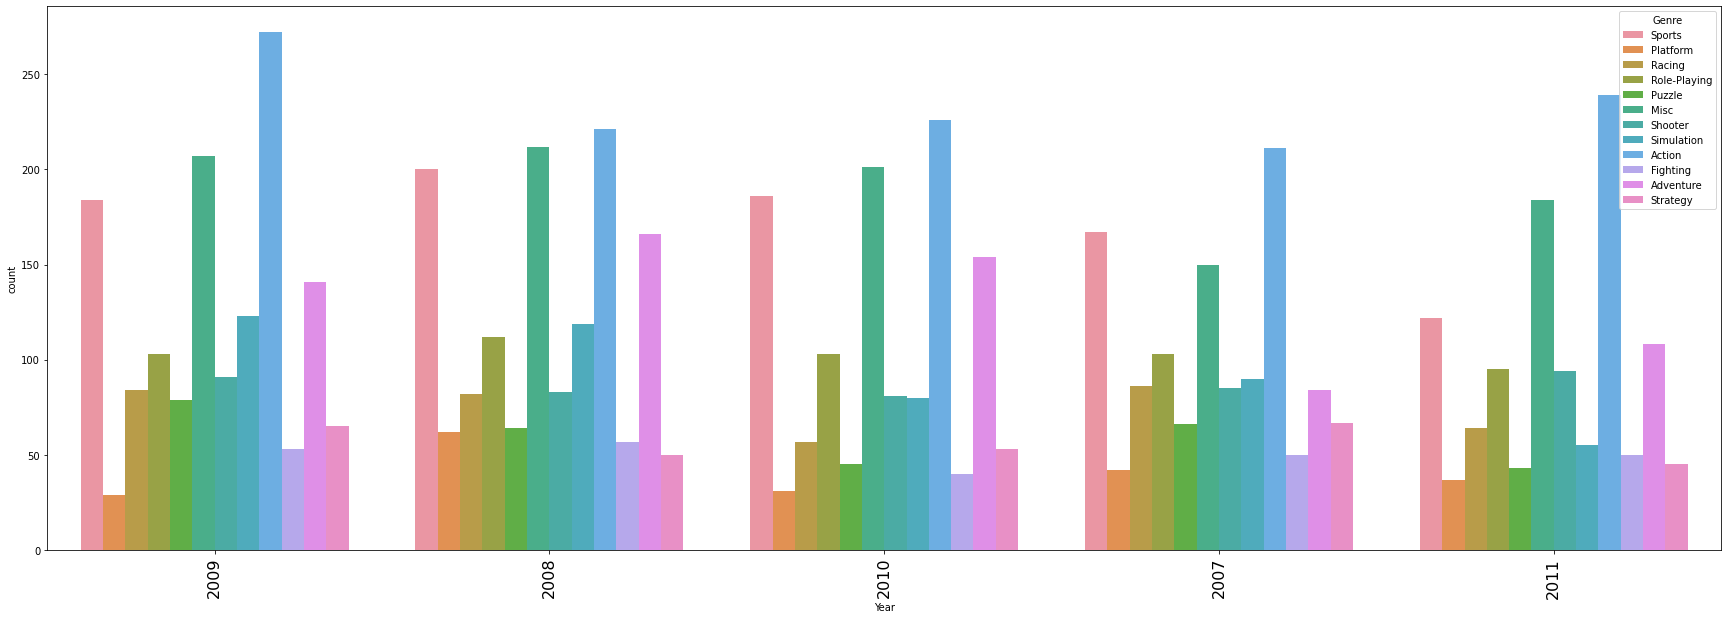

In [17]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

-----------------------------------------------------------

Frequency of different Genre



Text(0.5, 1.0, 'Frequency of different Genre')

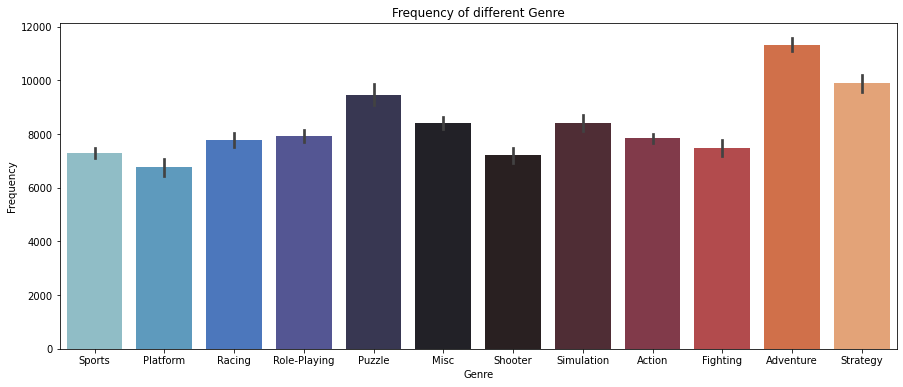

In [18]:
a=np.arange(1,16292)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Genre')

Adventure and strategy games are the highest in the dataset



------------------------------------------------------

Global Sales over the years



Text(0.5, 1.0, 'Global Sales over the years')

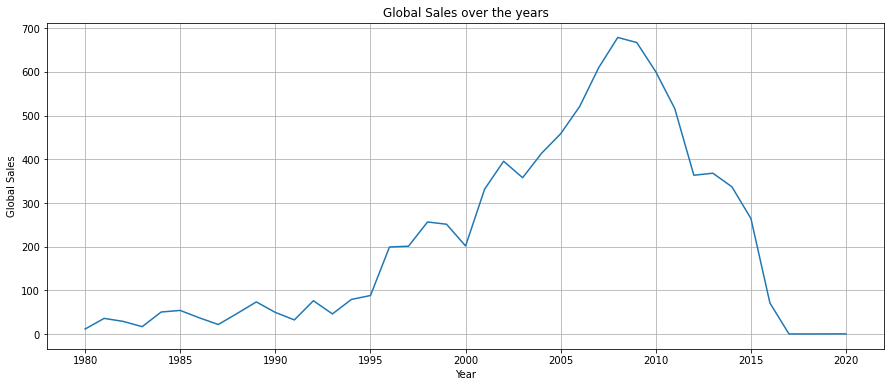

In [19]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

Highest sales have been recorded from 2007 to 2010



----------------------------------------------------------

Sales of games in different platforms globally



Text(0.5, 1.0, 'Sales of games in different platforms globally')

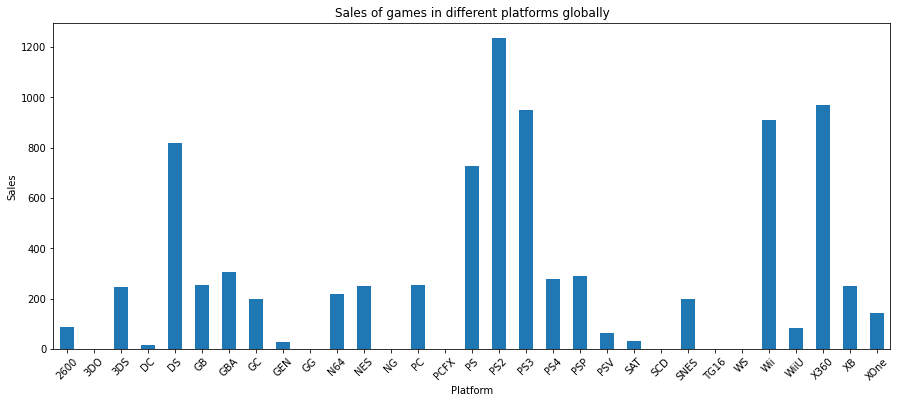

In [20]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Sales of games in different platforms globally')

PS2 has recorded highest sales globally



----------------------------------------------------------

Which genre game has been released the most in a single year?

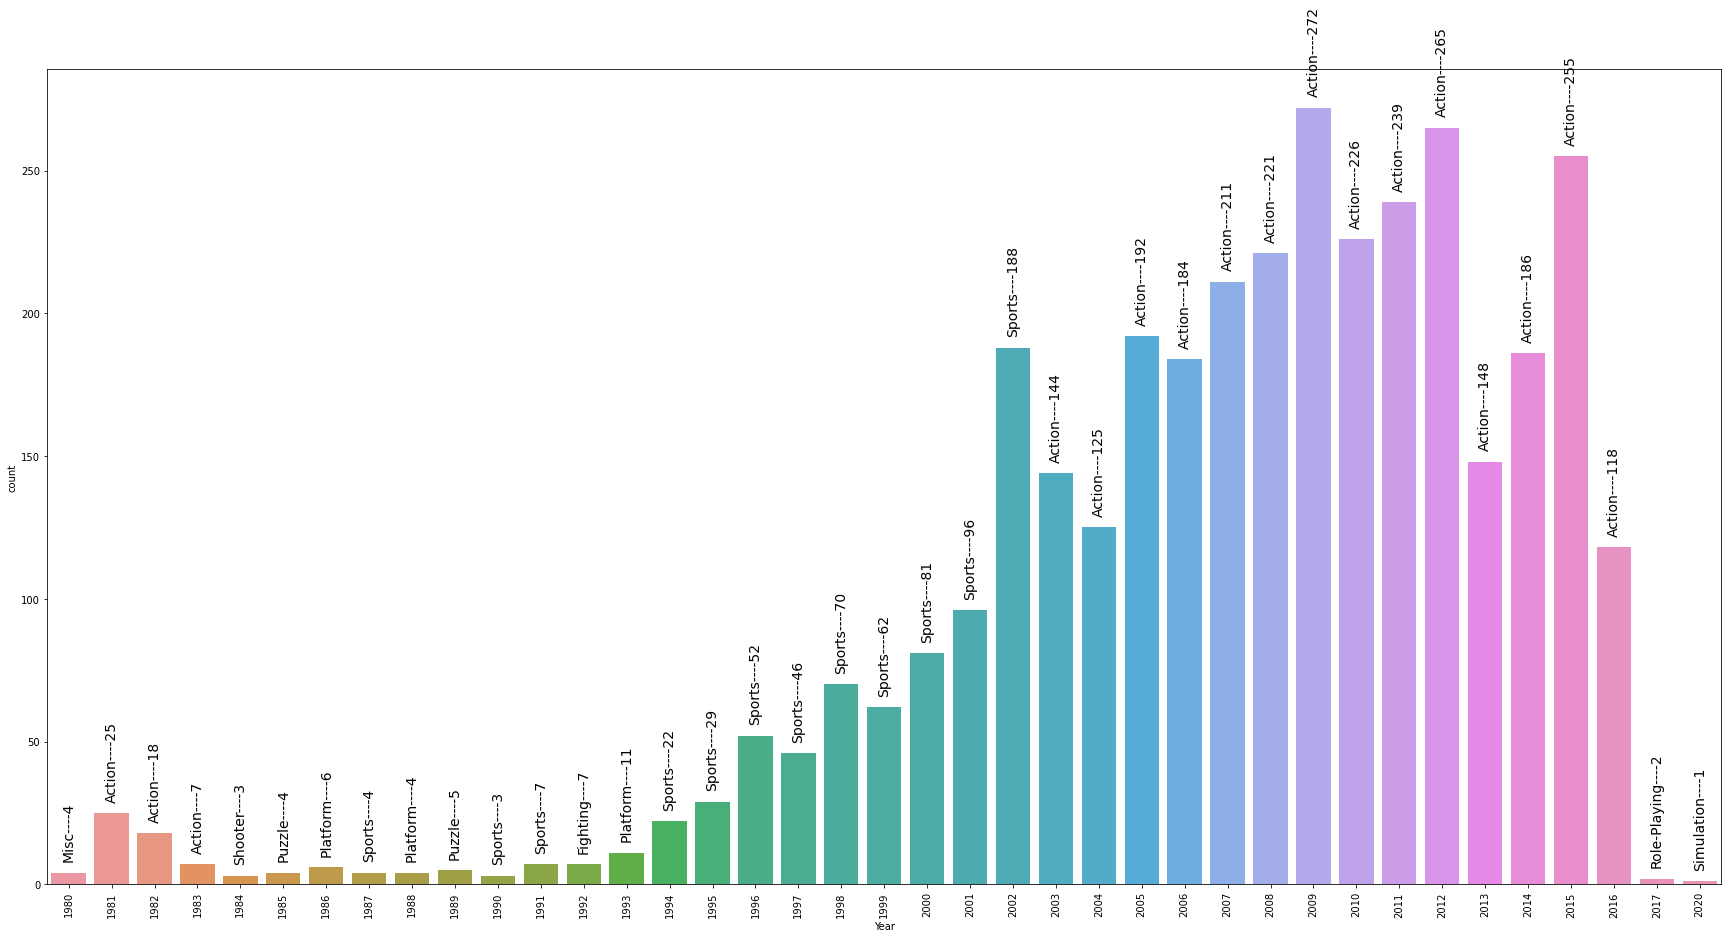

In [21]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

2009 Action 272 and 2012 Action  266 games are release.

----------------------------------------------------------------------------

/Users/pablobasapacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


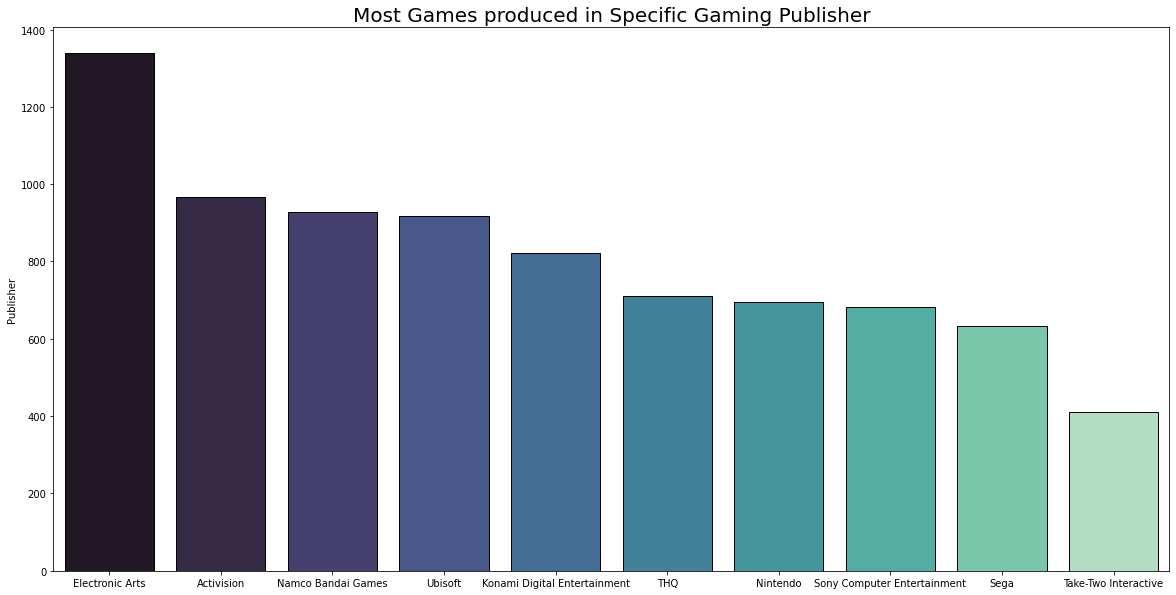

In [22]:
top10=df["Publisher"].value_counts().index
plt.figure(figsize = (20,10))
sns.barplot(top10[:10], df["Publisher"].value_counts().iloc[:10]
           ,palette='mako'
           ,edgecolor='black'
           )
plt.title("Most Games produced in Specific Gaming Publisher",fontsize=20)
plt.show()

Top 10 Publisher in order and most is Electronic Arts

-----------------------------------------------------------------

Which genre game has sold the most in a single year?

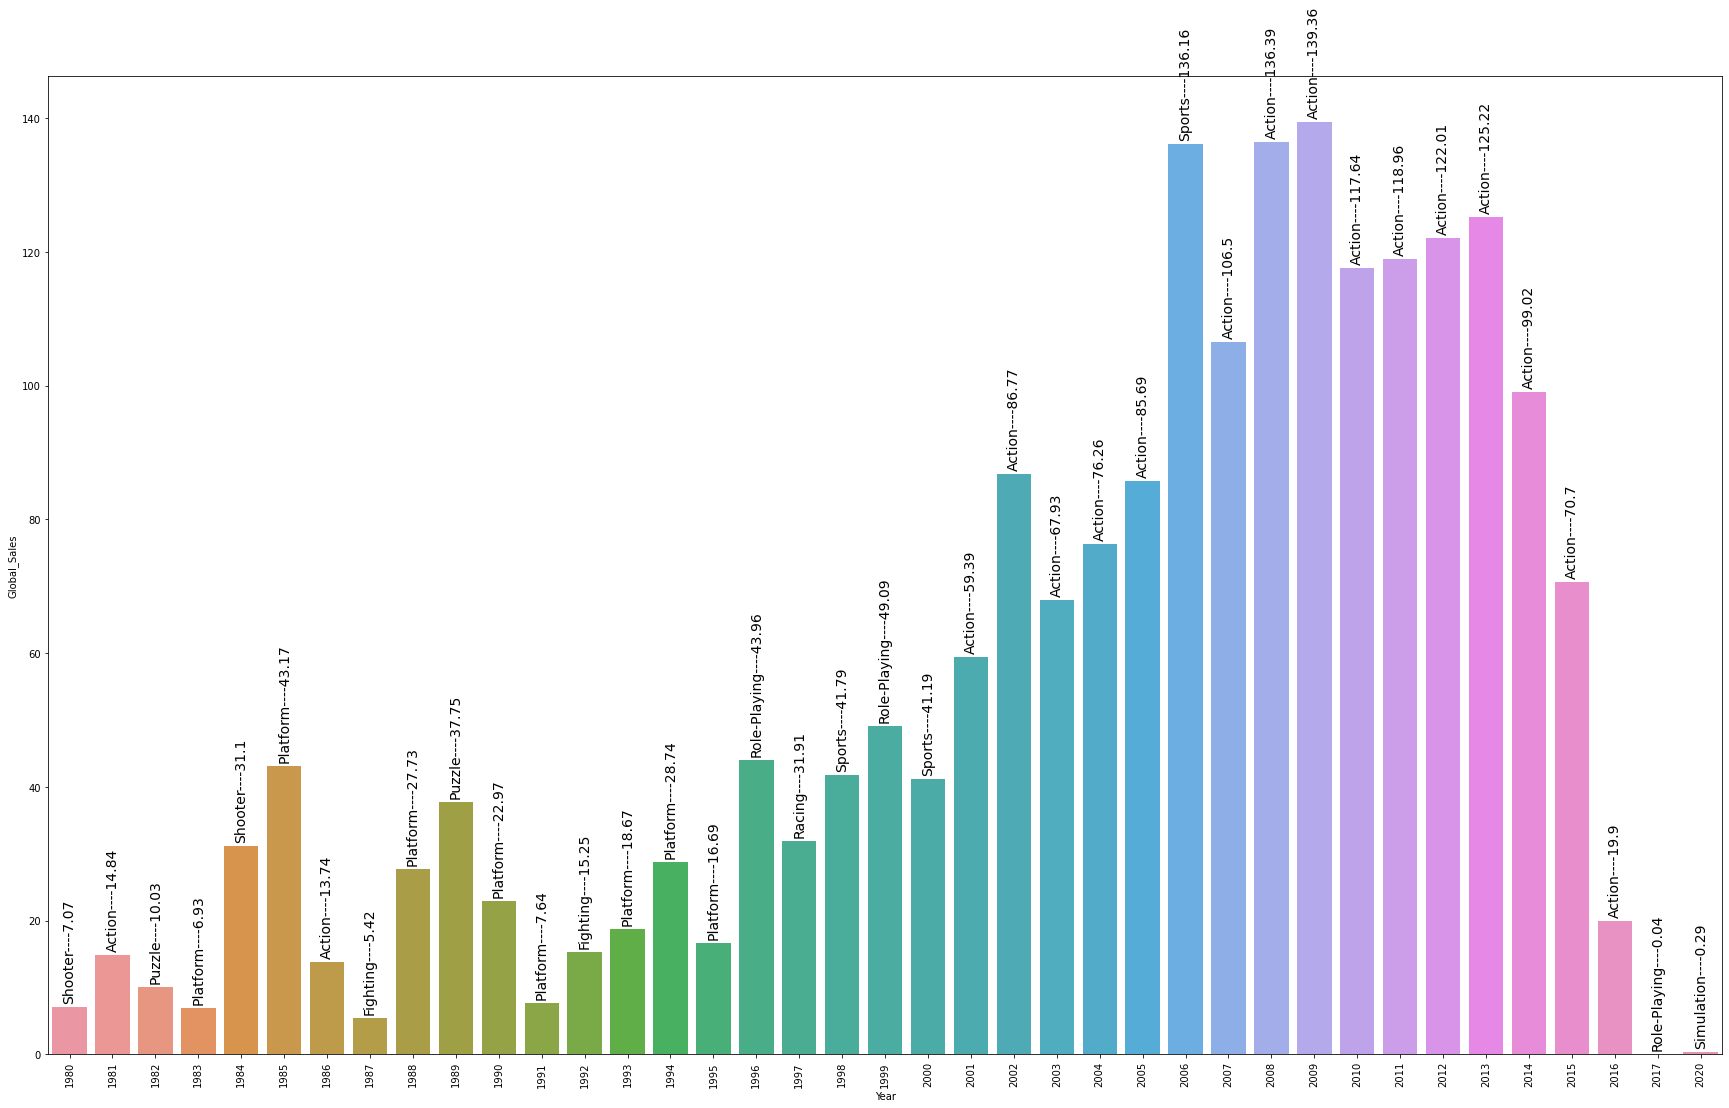

In [23]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

2009 Action is 139.36 million and 2008 Action is 136.39 miliion .

------------------------------------------------------------------

Distribution of Top Seller 50 Games by Publishers¶


In [24]:
Top50byPublisher = df.nlargest(50, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
Top50byPublisher = Top50byPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50byPublisher

Publisher  Number of Games
0                     Nintendo               32
1       Microsoft Game Studios                2
2         Take-Two Interactive                6
3  Sony Computer Entertainment                2
4                   Activision                8

------------------------------------------------------------------------

 Sales compearison by genre

<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

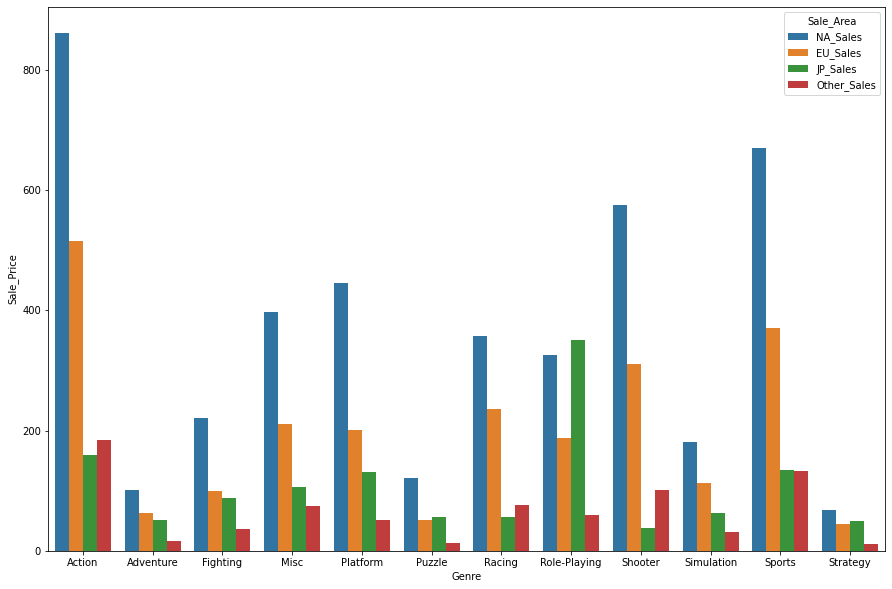

In [25]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

See, Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most

--------------------------------------------------------

Total profit by region

In [26]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg


region     sale
0     NA_Sales  4327.65
1     EU_Sales  2406.69
2     JP_Sales  1284.27
3  Other_Sales   788.91

<AxesSubplot:xlabel='region', ylabel='sale'>

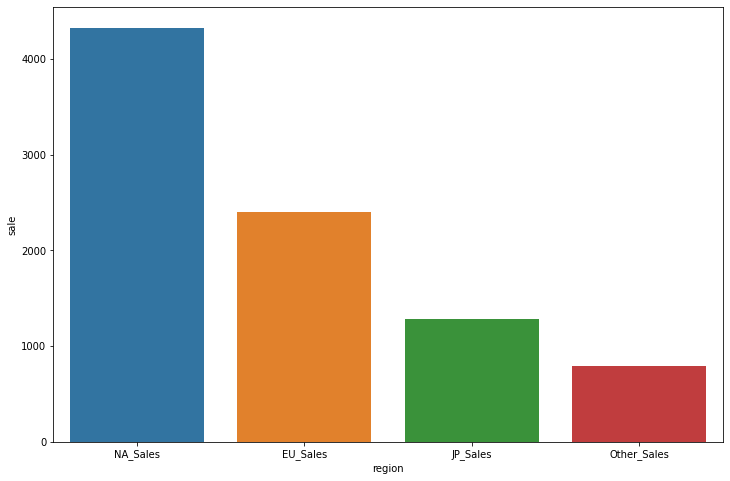

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x7f805dc15b20>,
 [Text(-1.0995946696115964, 0.029859044890360033, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790763, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704052, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

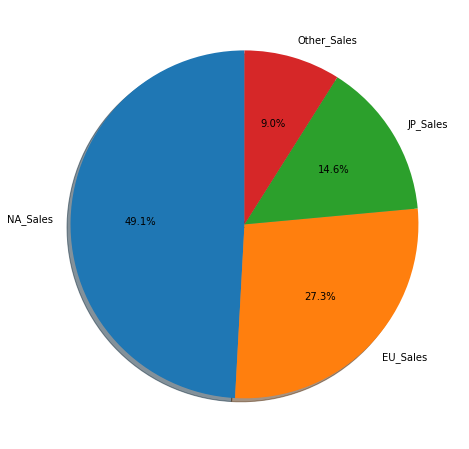

In [28]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

North America is the top

-----------------------------------------------------------------

<AxesSubplot:xlabel='Year'>

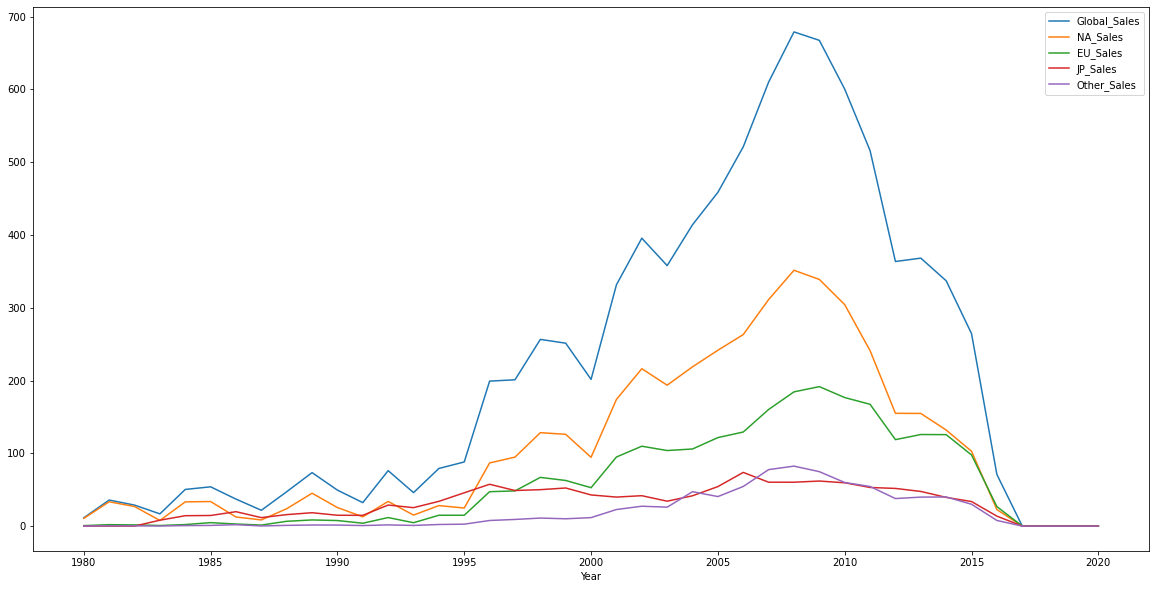

In [29]:
GSales_Year = df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10))

1. most of sales between 2005 and 2010
2. lest sales in 1980 to 1990



------------------------------------------

Playstation vs PC Global Sales Comparison¶


In [30]:
PS = df[df['Platform'] == 'PS'].groupby('Year')['Global_Sales'].sum().reset_index()
PS2 = df[df['Platform'] == 'PS2'].groupby('Year')['Global_Sales'].sum().reset_index()
PS3 = df[df['Platform'] == 'PS3'].groupby('Year')['Global_Sales'].sum().reset_index()
PS4 = df[df['Platform'] == 'PS4'].groupby('Year')['Global_Sales'].sum().reset_index()
PC = df[df['Platform'] == 'PC'].groupby('Year')['Global_Sales'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=PS['Year'], y=PS['Global_Sales'],
                         name="PS Sales",
                         hovertext=PS['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS3['Year'], y=PS3['Global_Sales'],
                         name="PS3 Sales",
                         hovertext=PS3['Global_Sales']))

fig.add_trace(go.Scatter(x=PS4['Year'], y=PS4['Global_Sales'],
                         name="PS4 Sales",
                         hovertext=PS4['Global_Sales']))

fig.add_trace(go.Scatter(x=PC['Year'], y=PC['Global_Sales'],
                         name="PC Sales",
                         hovertext=PC['Global_Sales']))

fig.update_layout(title_text='Playstation vs PC Global Sales Comparison',
                  title_x=0.5, title_font=dict(size=22))  
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Global Sales (M)")

fig.show()

----------------------------------------------------------------------------------------------

# Dealing with Outliers

<AxesSubplot:>

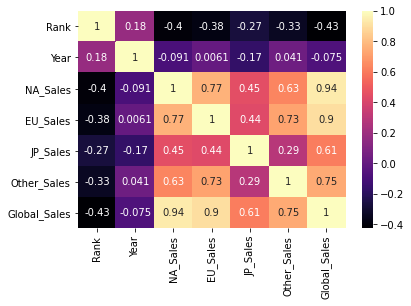

In [31]:
dfcopy=df.corr() 

sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
NA_Sales         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
JP_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Other_Sales        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Global_Sales    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

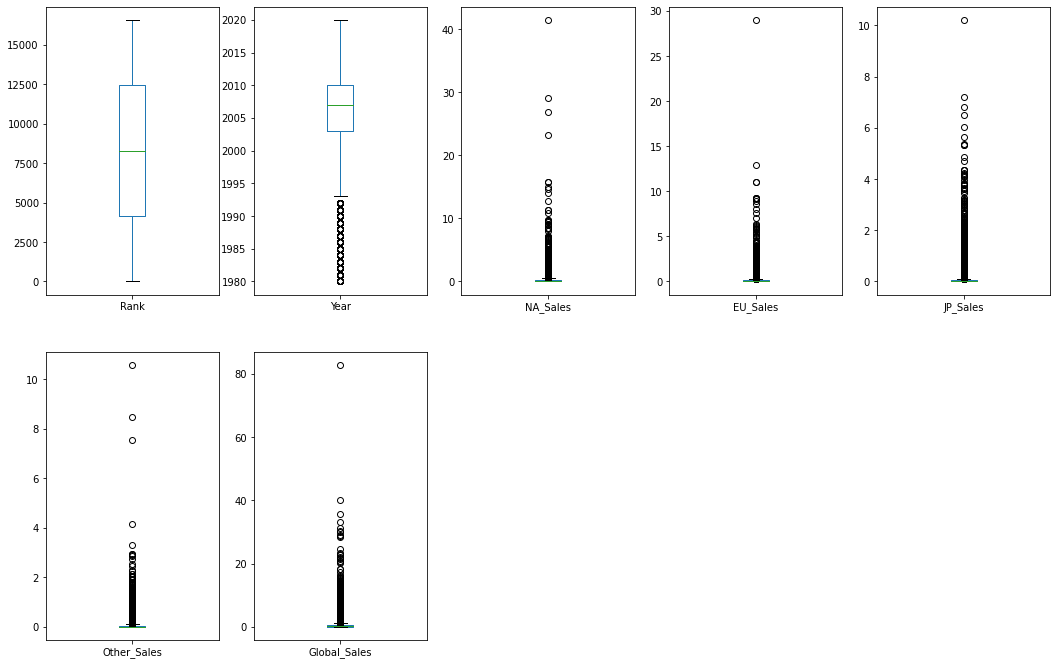

In [32]:

df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))


/Users/pablobasapacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 30.47140487188924)

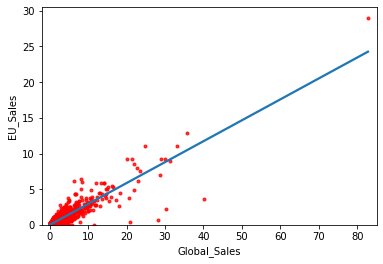

In [33]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [34]:
df = df.drop([0],axis=0) 

/Users/pablobasapacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 13.52411103334368)

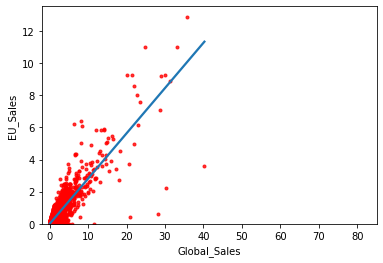

In [35]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

---------------------------------------------------------------

# Label Encoding and prepare X and y

In [36]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5     6                    Tetris       GB  1989        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26

# 

In [37]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])
    

In [38]:
dff.head()

Rank                      Name  Platform  Year  Genre Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4  Nintendo     29.08   
2     3            Mario Kart Wii        26  2008      6  Nintendo     15.85   
3     4         Wii Sports Resort        26  2009     10  Nintendo     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7  Nintendo     11.27   
5     6                    Tetris         5  1989      5  Nintendo     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

---------------------------------------------------

In [39]:
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

# Train | Test

In [40]:
X.shape

(16290, 6)

In [41]:
y.shape

(16290,)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [44]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)


# Modeling

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

**Decsion Tree**

In [46]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)




DecisionTreeRegressor()

In [47]:
regressor.score(x_train,y_train)

0.9999977849831169

In [48]:
regressor.score(x_test,y_test)


0.9569881616320826

In [49]:
yTreePre= regressor.predict(x_test)

In [50]:
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.9569881616320826

In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04922760373493378


In [52]:
db = pd.DataFrame({'Actual': y_test, 'Predicted': yTreePre})
db

Actual  Predicted
0       0.57   0.570000
1       0.02   0.020000
2       0.33   0.320000
3       0.67   0.600000
4       0.15   0.155000
...      ...        ...
4068    0.05   0.043333
4069    0.23   0.240000
4070    2.20   2.270000
4071    0.19   0.190000
4072    0.13   0.131667

[4073 rows x 2 columns]

<Figure size 1152x576 with 0 Axes>

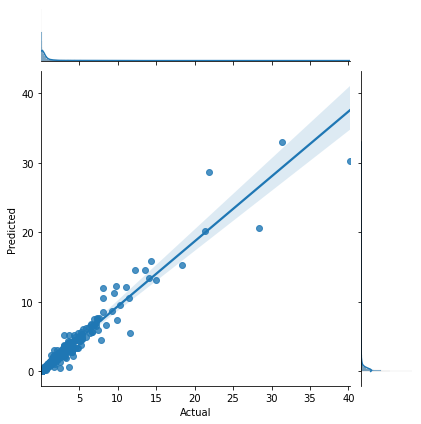

In [53]:
test = pd.DataFrame({'Predicted':yTreePre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

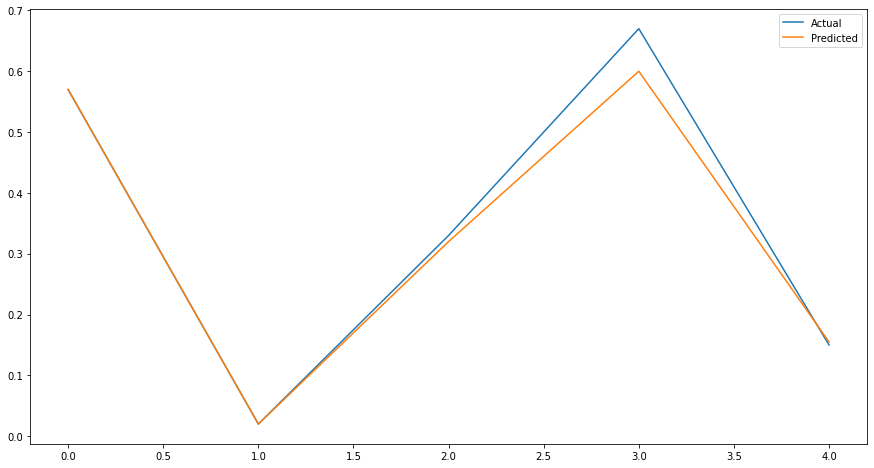

In [54]:
db1 = db.head()
db1.plot(kind='line',figsize=(15,8))
plt.show()

In [55]:
regressor.feature_importances_

array([0.00121361, 0.00177409, 0.84659542, 0.11233672, 0.03125402,
       0.00682615])

------------------------------------------

**Ridge**

In [56]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [57]:
rid.score(x_train,y_train)

0.9999861192147286

In [58]:
rid.score(x_test,y_test)

0.999987986050178

In [59]:
yRidPre = rid.predict(x_test)

In [60]:
r2Rid = r2_score(y_test ,yRidPre )
r2Rid

0.999987986050178

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRidPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029551375102583655


In [62]:
dbRidge = pd.DataFrame({'Actual': y_test, 'Predicted': yRidPre})
dbRidge

Actual  Predicted
0       0.57   0.570265
1       0.02   0.020326
2       0.33   0.320226
3       0.67   0.670218
4       0.15   0.150223
...      ...        ...
4068    0.05   0.040200
4069    0.23   0.240351
4070    2.20   2.200274
4071    0.19   0.190430
4072    0.13   0.130424

[4073 rows x 2 columns]

In [63]:
x_test.shape

(4073, 6)

In [64]:
y_test.shape

(4073,)

<Figure size 1152x576 with 0 Axes>

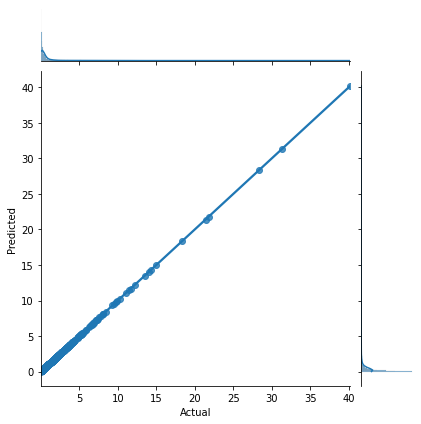

In [65]:
test = pd.DataFrame({'Predicted':yRidPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

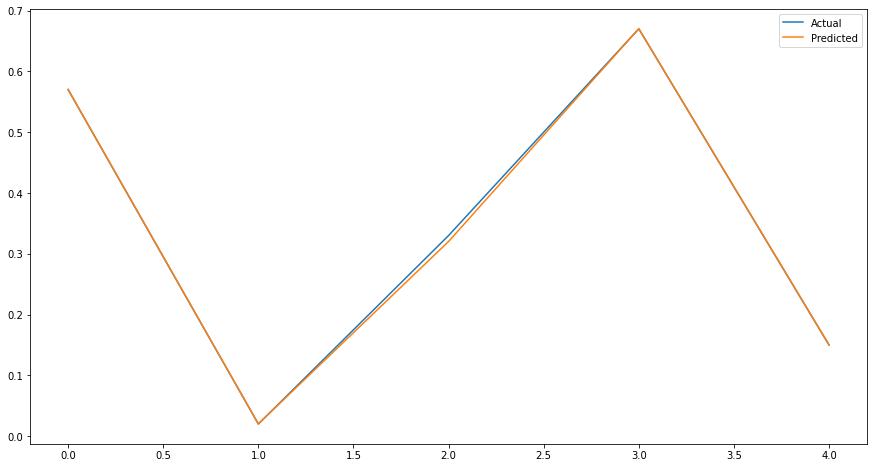

In [66]:
dbridge1 = dbRidge.head()
dbridge1.plot(kind='line',figsize=(15,8))
plt.show()

In [67]:
rid.coef_

array([-1.08639110e-04, -4.71152381e-05,  2.39991637e-01,  1.10008370e-01,
        3.99908258e-02,  3.99685165e-02])

--------------------------------------------------------

**LinearRegression**

In [68]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.score(x_train,y_train)

0.9999861192562169

In [70]:
lr.score(x_test,y_test)

0.9999879850329042

In [71]:
yLinearPre = lr.predict(x_test)

In [72]:
r2Linear = r2_score(y_test , yLinearPre)
r2Linear

0.9999879850329042

<Figure size 1152x576 with 0 Axes>

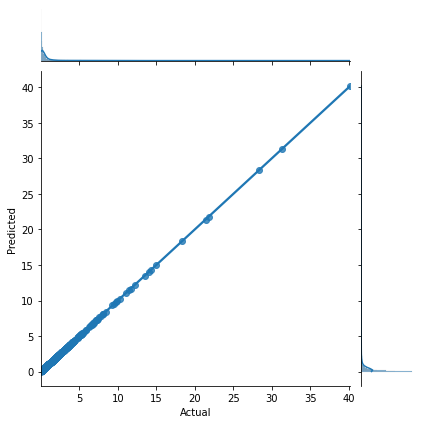

In [73]:
test = pd.DataFrame({'Predicted':yLinearPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [74]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029547715225956323


In [75]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yLinearPre})
dbLinear

Actual  Predicted
0       0.57   0.570270
1       0.02   0.020324
2       0.33   0.320229
3       0.67   0.670215
4       0.15   0.150223
...      ...        ...
4068    0.05   0.040197
4069    0.23   0.240351
4070    2.20   2.200280
4071    0.19   0.190427
4072    0.13   0.130425

[4073 rows x 2 columns]

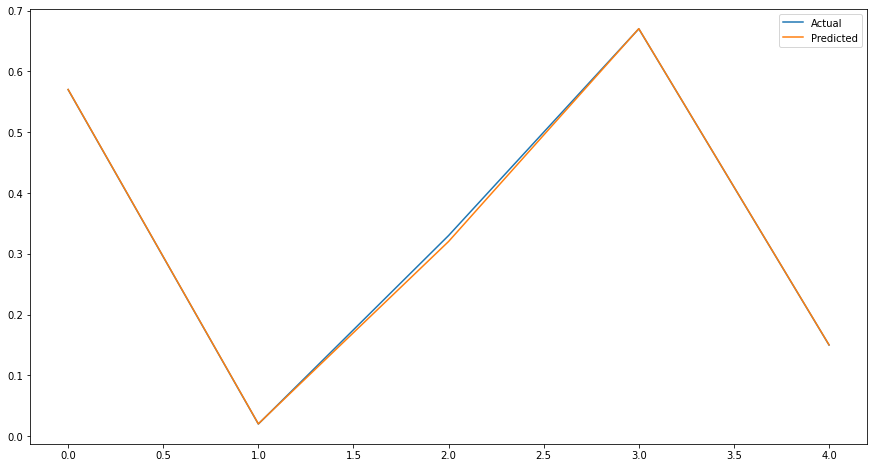

In [76]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [77]:
lr.coef_

array([-1.09384339e-04, -4.72731391e-05,  2.39996484e-01,  1.10007377e-01,
        3.99904466e-02,  3.99673977e-02])

-----------------------------------------------

**RandomForestRegressor**

In [78]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [79]:
rf.score(x_train,y_train)

0.9971359677408186

In [80]:
rf.score(x_test,y_test)

0.9606065108309323

In [81]:
yRandomPre= rf.predict(x_test)

In [82]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.9606065108309323

In [83]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.030770245007638117


In [84]:
dbRandom = pd.DataFrame({'Actual': y_test, 'Predicted': yRandomPre})
dbRandom

Actual  Predicted
0       0.57   0.572300
1       0.02   0.020000
2       0.33   0.320400
3       0.67   0.651800
4       0.15   0.155310
...      ...        ...
4068    0.05   0.043882
4069    0.23   0.239400
4070    2.20   2.230200
4071    0.19   0.190000
4072    0.13   0.131627

[4073 rows x 2 columns]

<Figure size 1152x576 with 0 Axes>

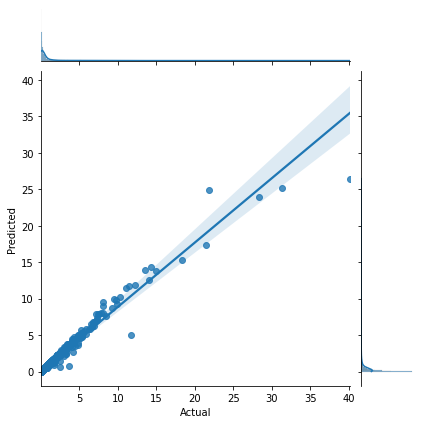

In [85]:
test = pd.DataFrame({'Predicted':yRandomPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

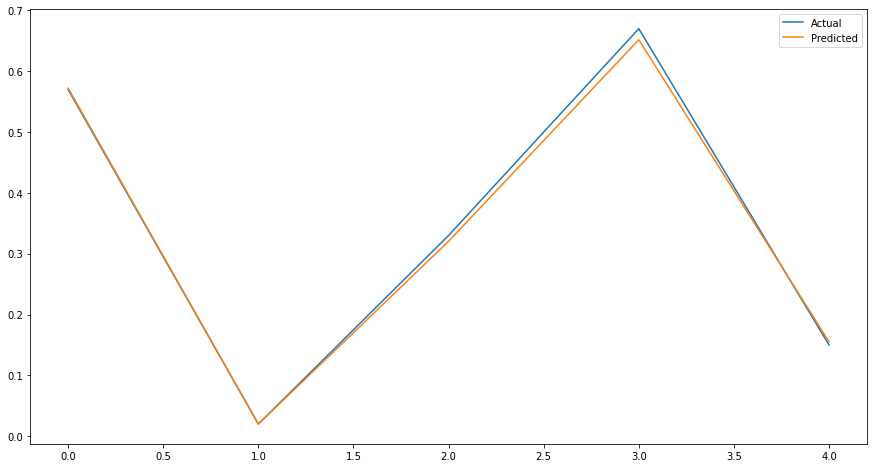

In [86]:
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='line',figsize=(15,8))
plt.show()

In [87]:
rf.feature_importances_

array([0.00157339, 0.00128945, 0.81412245, 0.14265803, 0.03245806,
       0.00789862])

----------------------------------------------------------------

**KNN**

In [88]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [89]:
knn.score(x_train,y_train)

0.9830285776808074

In [90]:
knn.score(x_test , y_test)

0.9134505880323968

In [91]:
pred = knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9134505880323968


In [92]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04690498404124723


In [93]:
dbKNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
dbKNN

Actual  Predicted
0       0.57      0.560
1       0.02      0.020
2       0.33      0.320
3       0.67      0.578
4       0.15      0.150
...      ...        ...
4068    0.05      0.020
4069    0.23      0.254
4070    2.20      2.180
4071    0.19      0.190
4072    0.13      0.132

[4073 rows x 2 columns]

In [ ]:
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
dbKNN1 = dbKNN.head()
dbKNN1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np
np.random.seed(1)
m = sm.add_constant(X)
est = sm.OLS(y, m)
est2 = est.fit()
print(est2.params)

--------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from scipy import stats
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

# Conclusion 

1. Most Games produced in Specific Gaming Platform is DS then Ps2
2. The most popular type of game is Action then Sports. Lowest is Puzzle
3. Top 10 Publisher in order and most is Electronic Arts
4. Most games Produced in between 2002 to 2016 sp in 2010
5. Most published type of games is Action
6. Most of sales between 2005 and 2010 .lest sales in 1980 to 1990

 -----------------------------------------------------------------------
 best Models ara Ridge and Linear Regression


 ✌ Thank you for reading:

---



---

